<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 26 **
** ┗ Telecommunications company departure customer prediction **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉Session 1 -「Exploring Good Customer」
* 🥈SESSION 2 -「Out of Deviation Customer Characteristics」
* 🥇SESSION 3 -「ML Utilization Departure Customer Prediction」


In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/26_Telecom Churn Prediction')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/DA portfolio/DA_colab/26_Telecom Churn Prediction'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 📞 (Marketer, Service Planner)

``
A telecommunications company was the industry's No. 1 carrier, but its reputation is becoming colorless.As various competitors emerge, M/S is falling, and departure customers to other carriers
It is increasing.Therefore, we will predict customers who are likely to leave and try to develop terms of termination.

``


> ** Looking at the data **

* Telecommunications customer profile data
* Data specification ⬇

| Customerid | Gender | Seniorcitizen | Partner | dependents | Tenure |
|: ---: |: ---: | ---: | ---: ---: | ---: | ---: |
| Customer ID | Gender | whether the elderly is married | Whether to be married | Whether or not you have a dependence | Membership month |
| PhoneService | Multiplelines | InternetService | OnlineSecurity | OnlineBackup | DeviceProtection |
| Call service | Whether or not to be multi -line | Internet service provider | Whether online security | Online backup | Device Insurance |
| Techsupport | StreamingTV | StreamingMovies | Contract | Paperlessbilling | Paymentmethod |
| Technical Support | whether or not you have a streaming TV | whether or not you have a streaming movie | Contract period | Whether there is no species | Payment method |
| Monthlycharges | TotalCharges | Churn |
| Monthly claims | Total amount claimed | Laying |


In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('chapter26_telco_customer.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Customer departure
``

> ** Expected effect **

``
▶ Customer departure defense
``

> ** Solution **

``
▶ Customer prediction and termination defense with high possibility of departure
▶ Session 1 🥉
-DATA pretreatment and superior customer characteristics
▶ Session 2 🥈
-Clean -by -category customer analysis
▶ Session 3 🥇
-Extraction customer prediction using ML algorithms
``

> ** Performance measurement **

``
▶ Monitoring before/after management for customers who are likely to leave
``

> ** Public application **

``
▶ Create data Mart for input to Model
▶ Operation of target extract and management program using predictive models
``

> ** Main code preview **

``
▶ Session 1 → Catplot, Groupby.agg ()
▶ Session 2 → Catplot, Groupby.agg ()
▶ Session 3 → RandomForestClassifier (), Labelencoder (), ROC_AUC_SCORE, ROC_CURVE
``


## ** 🥉Session 1 **
** ┗ Outstanding customer search **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ 7,043 row, 21 cola
print('df', df.shape)

df (7043, 21)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# ▶ Outlier verification
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### · Search for excellent customer
---



In [ ]:
# ▶ Customer groups with low departure rates
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
# ▶ About 27%departure rate
1869 / (1869 + 5174)

0.2653698707936959

In [ ]:
# ▶ Convert to target numeric data
import numpy as np
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


#### · (1) Long -term member
---



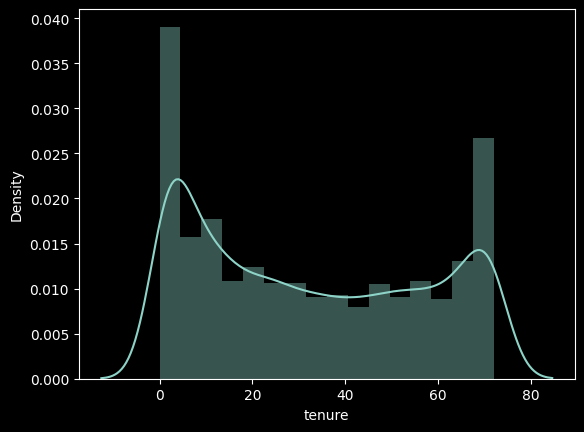

In [ ]:
# ▶ Hypothesis 1) Long -term customers, the lower the borrow rate.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.distplot(df['tenure']);

In [ ]:
# ▶ Sectionization
import numpy as np
df['tenure_gp'] = np.where (df['tenure'] <= 20, 'less than 20',
                           np.where(df['tenure'] <= 60, '20-60', 'more than 60'))

df[['tenure','tenure_gp']].head(5)

,tenure,tenure_gp
0,1,less than 20
1,34,20-60
2,2,less than 20
3,45,20-60
4,2,less than 20


In [ ]:
# ▶ The more long -term customers are excellent customers.
df_gp = df.groupby('tenure_gp')['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp['lift'] = round(df_gp['ratio'] / 27,1)
df_gp

,count,sum,ratio,lift
tenure_gp,,,,
20 이하,2878,1251,43.5,1.6
20-60 이하,2758,525,19.0,0.7
60 초과,1407,93,6.6,0.2


#### · (2) Premium rates
---



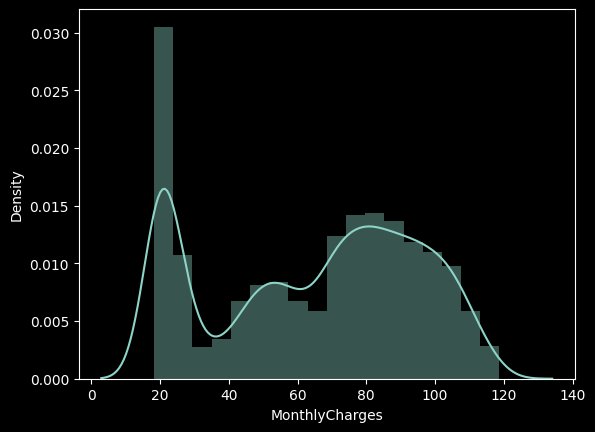

In [ ]:
# ▶ Premium fare members are excellent customers.
sns.distplot(df['MonthlyCharges']);

In [ ]:
# ▶ Sectionization
import numpy as np
df['MonthlyCharges_gp'] = np.where (df['MonthlyCharges'] <= 40, 'less than 40 ',
                           np.where(df['MonthlyCharges'] <= 80, '40-80', 'more than 80'))

df[['MonthlyCharges','MonthlyCharges_gp']].head(5)

,MonthlyCharges,MonthlyCharges_gp
0,29.85,less than 40
1,56.95,40-80
2,53.85,40-80
3,42.30,40-80
4,70.70,40-80


In [ ]:
# ▶ Premium fare members have a higher departure rate.
df_gp = df.groupby('MonthlyCharges_gp')['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp['lift'] = round(df_gp['ratio'] / 27,1)
df_gp

,count,sum,ratio,lift
MonthlyCharges_gp,,,,
40-80,2539,749,29.5,1.1
less than 40,1838,214,11.6,0.4
more than 80,2666,906,34.0,1.3


In [ ]:
# ▶ Analysis of the bachelor's rate according to the number of months of use and the premium rate member association
df_gp = df.groupby(['tenure_gp','MonthlyCharges_gp'])['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp

count  sum  ratio
tenure_gp    MonthlyCharges_gp                   
20-60        40-80                922  140   15.2
             less than 40         674   26    3.9
             more than 80        1162  359   30.9
less than 20 40-80               1300  597   45.9
             less than 40         873  187   21.4
             more than 80         705  467   66.2
more than 60 40-80                317   12    3.8
             less than 40         291    1    0.3
             more than 80         799   80   10.0

## ** 🥈Session 2 **
** ┗ Outdoor customer characteristics analysis **
---


###, demographic characteristics -analysis
---


In [ ]:
# ▶ Through max option ... Activation of expression
pd.set_option('display.max_columns', 500)
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_gp,MonthlyCharges_gp
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,less than 20,less than 40
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,20-60,40-80
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,less than 20,40-80
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,20-60,40-80
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,less than 20,40-80


In [ ]:
# ▶ Population Statistics Characteristic Gender/Silver Customer/Marriage/Dependent Family
df[['gender', 'SeniorCitizen', 'Partner', 'Dependents']].head(10)

,gender,SeniorCitizen,Partner,Dependents
0,Female,0,Yes,No
1,Male,0,No,No
2,Male,0,No,No
3,Male,0,No,No
4,Female,0,No,No
5,Female,0,No,No
6,Male,0,No,Yes
7,Female,0,No,No
8,Female,0,Yes,No
9,Male,0,No,Yes


        count  sum  ratio  lift
gender                         
Female   3488  939   26.9   1.0
Male     3555  930   26.2   1.0


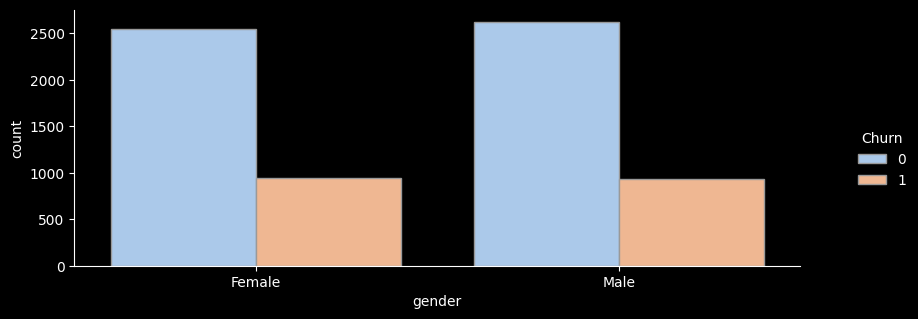

In [ ]:
# ▶ Gender (gender)
sns.catplot(x="gender", hue="Churn", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('gender')['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp['lift'] = round(df_gp['ratio'] / ((df['Churn'].sum() / len(df))*100) ,1)
print(df_gp)

               count   sum  ratio  lift
SeniorCitizen                          
0               5901  1393   23.6   0.9
1               1142   476   41.7   1.6


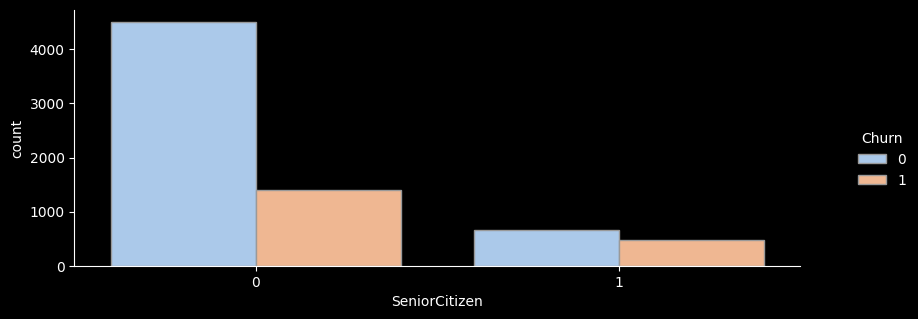

In [ ]:
# ▶ Seniorcitizen (older households)
sns.catplot(x="SeniorCitizen", hue="Churn", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('SeniorCitizen')['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp['lift'] = round(df_gp['ratio'] / ((df['Churn'].sum() / len(df))*100) ,1)
print(df_gp)

         count   sum  ratio  lift
Partner                          
No        3641  1200   33.0   1.2
Yes       3402   669   19.7   0.7


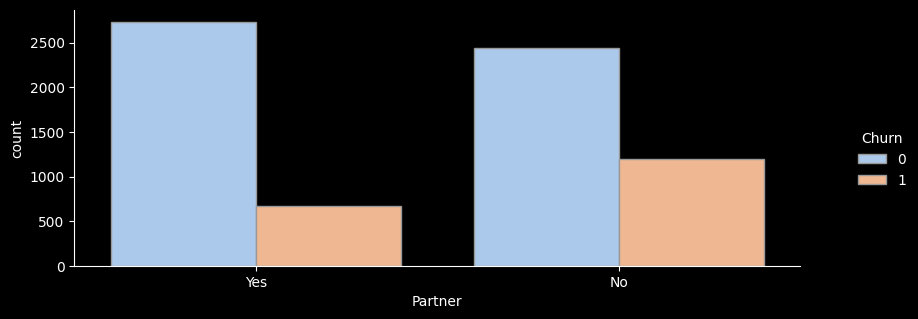

In [ ]:
# ▶ Partner (marriage)
sns.catplot(x="Partner", hue="Churn", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('Partner')['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp['lift'] = round(df_gp['ratio'] / ((df['Churn'].sum() / len(df))*100) ,1)
print(df_gp)

            count   sum  ratio  lift
Dependents                          
No           4933  1543   31.3   1.2
Yes          2110   326   15.5   0.6


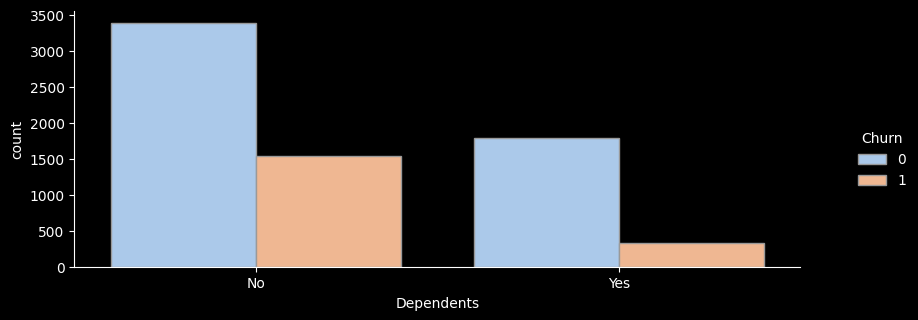

In [ ]:
# ▶ depends
sns.catplot(x="Dependents", hue="Churn", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby('Dependents')['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp['lift'] = round(df_gp['ratio'] / ((df['Churn'].sum() / len(df))*100) ,1)
print(df_gp)

### · Additional service use -analysis
---


In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_gp,MonthlyCharges_gp
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,less than 20,less than 40
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,20-60,40-80
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,less than 20,40-80
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,20-60,40-80
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,less than 20,40-80


In [ ]:
# ▶ Additional Service COL, On -in Backup Service/Device Insurance Service/Technical Support Service/Streaming TV/Streaming Movie Service
df[['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,Yes,No,No,No,No
1,No,Yes,No,No,No
2,Yes,No,No,No,No
3,No,Yes,Yes,No,No
4,No,No,No,No,No
...,...,...,...,...,...
7038,No,Yes,Yes,Yes,Yes
7039,Yes,Yes,No,Yes,Yes
7040,No,No,No,No,No
7041,No,No,No,No,No


                     count   sum  ratio  lift
OnlineBackup                                 
No                    3088  1233   39.9   1.5
No internet service   1526   113    7.4   0.3
Yes                   2429   523   21.5   0.8


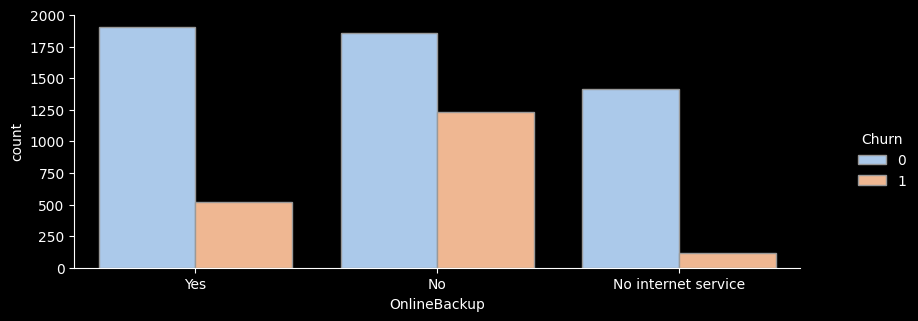

In [ ]:
# ▶ OnlineBackup (online backup)
val = 'OnlineBackup'

sns.catplot(x=val, hue="Churn", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby(val)['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp['lift'] = round(df_gp['ratio'] / ((df['Churn'].sum() / len(df))*100) ,1)
print(df_gp)

                     count   sum  ratio  lift
OnlineBackup                                 
No                    3088  1233   39.9   1.5
No internet service   1526   113    7.4   0.3
Yes                   2429   523   21.5   0.8
---------------------------------------
                     count   sum  ratio  lift
DeviceProtection                             
No                    3095  1211   39.1   1.5
No internet service   1526   113    7.4   0.3
Yes                   2422   545   22.5   0.8
---------------------------------------
                     count   sum  ratio  lift
TechSupport                                  
No                    3473  1446   41.6   1.6
No internet service   1526   113    7.4   0.3
Yes                   2044   310   15.2   0.6
---------------------------------------
                     count  sum  ratio  lift
StreamingTV                                 
No                    2810  942   33.5   1.3
No internet service   1526  113    7.4   0.3
Yes       

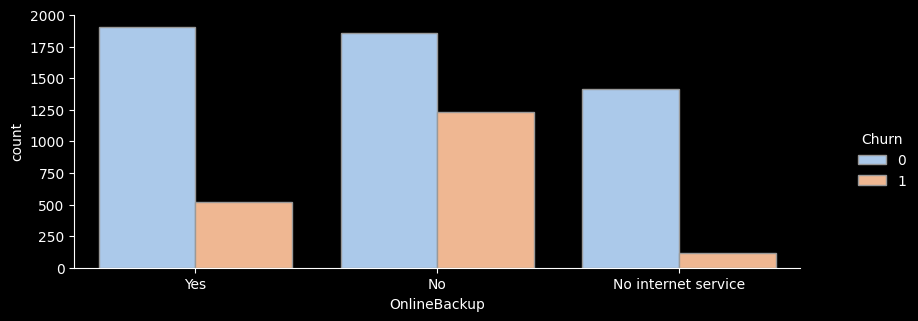

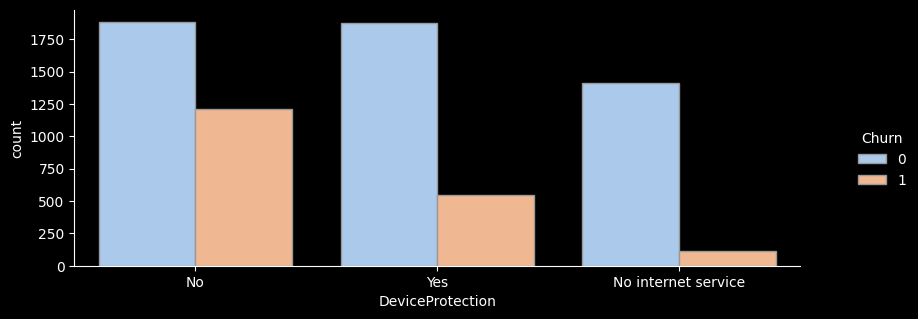

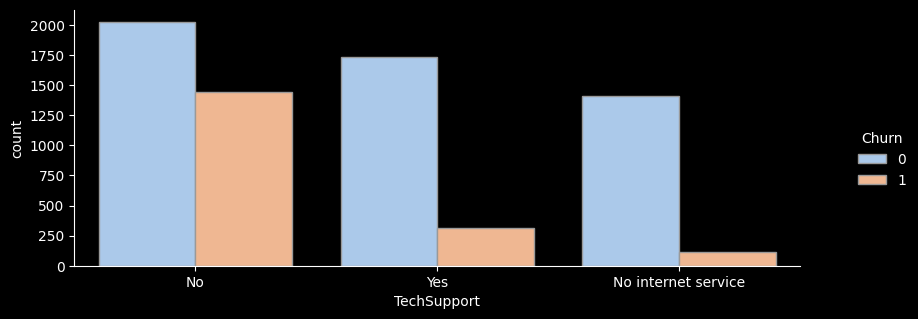

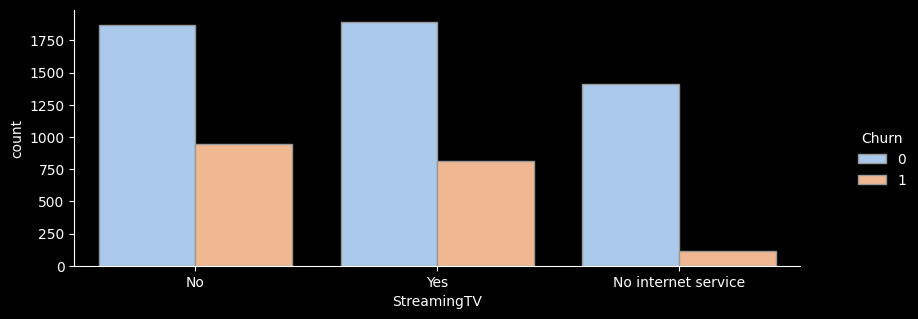

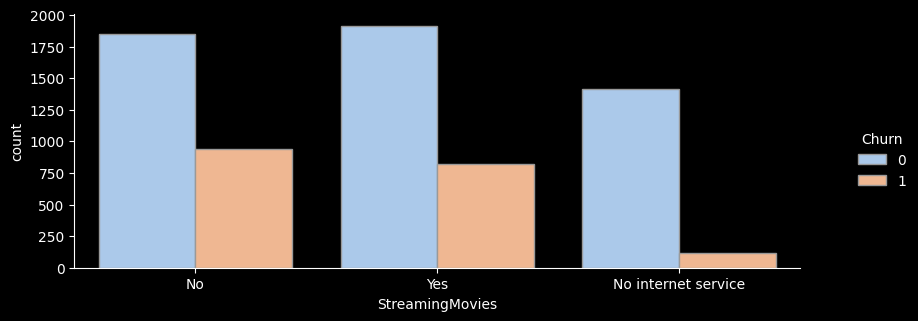

In [ ]:
# ▶ Output at once

col_list = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in col_list :
  val = i

  sns.catplot(x=val, hue="Churn", kind="count",palette="pastel", edgecolor=".6",data=df);
  plt.gcf().set_size_inches(10, 3)


  df_gp = df.groupby(val)['Churn'].agg(['count','sum'])
  df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
  df_gp['lift'] = round(df_gp['ratio'] / ((df['Churn'].sum() / len(df))*100) ,1)
  print(df_gp)
  print("---------------------------------------")

In [ ]:
# ▶ Analysis of the beach rate to customers who do not use all the additional service.
df_no = df[(df['OnlineBackup'] =='No') & (df['DeviceProtection'] =='No') & (df['TechSupport'] =='No') & (df['StreamingTV'] =='No') & (df['StreamingMovies'] =='No')]
df_no[col_list]

,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4,No,No,No,No,No
7,No,No,No,No,No
10,No,No,No,No,No
34,No,No,No,No,No
36,No,No,No,No,No
...,...,...,...,...,...
7026,No,No,No,No,No
7032,No,No,No,No,No
7033,No,No,No,No,No
7040,No,No,No,No,No


In [ ]:
# ▶ All additional service forms are 47.6% departure rate, LIFT about 1.8
df_no['Churn'].sum() / len(df_no)

np.float64(0.4769585253456221)

### · Contract type, rate -depression rate analysis

---


In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_gp,MonthlyCharges_gp
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,less than 20,less than 40
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,20-60,40-80
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,less than 20,40-80
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,20-60,40-80
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,less than 20,40-80


In [ ]:
# ▶ Contract type col, contract period/paper without species/payment method
df[['Contract', 'PaperlessBilling', 'PaymentMethod']]

,Contract,PaperlessBilling,PaymentMethod
0,Month-to-month,Yes,Electronic check
1,One year,No,Mailed check
2,Month-to-month,Yes,Mailed check
3,One year,No,Bank transfer (automatic)
4,Month-to-month,Yes,Electronic check
...,...,...,...
7038,One year,Yes,Mailed check
7039,One year,Yes,Credit card (automatic)
7040,Month-to-month,Yes,Electronic check
7041,Month-to-month,Yes,Mailed check


In [ ]:
# ▶ Output at once
col_list = ['Contract', 'PaperlessBilling', 'PaymentMethod']

for i in col_list :
  val = i

  df_gp = df.groupby(val)['Churn'].agg(['count','sum'])
  df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
  df_gp['lift'] = round(df_gp['ratio'] / ((df['Churn'].sum() / len(df))*100) ,1)
  print(df_gp)
  print("---------------------------------------------------")

                count   sum  ratio  lift
Contract                                
Month-to-month   3875  1655   42.7   1.6
One year         1473   166   11.3   0.4
Two year         1695    48    2.8   0.1
---------------------------------------------------
                  count   sum  ratio  lift
PaperlessBilling                          
No                 2872   469   16.3   0.6
Yes                4171  1400   33.6   1.3
---------------------------------------------------
                           count   sum  ratio  lift
PaymentMethod                                      
Bank transfer (automatic)   1544   258   16.7   0.6
Credit card (automatic)     1522   232   15.2   0.6
Electronic check            2365  1071   45.3   1.7
Mailed check                1612   308   19.1   0.7
---------------------------------------------------


## ** 🥇Session 3 **
** ┗ ML utilization departure customer prediction **
---


### · Preparation of data for modeling
---
* Sharing data to FEATURE and Y, which is the value you want to predict to perform modeling
* Train / test set division for learning and prediction


In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_gp,MonthlyCharges_gp
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,less than 20,less than 40
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,20-60,40-80
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,less than 20,40-80
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,20-60,40-80
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,less than 20,40-80


In [ ]:
# ▶ Numeric, Categorical Value Sharing
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

print("categoical_list :", categoical_list)
print("numeric_list :", numeric_list)

categoical_list : ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'tenure_gp', 'MonthlyCharges_gp']
numeric_list : ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn']


In [ ]:
# ▶ Steps to distinguish between Fearue (x) and Y data for learning modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['customerID', 'tenure_gp', 'MonthlyCharges_gp', 'Churn'], axis=1)
Y=df['Churn']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4930, 19)
(4930,)
(2113, 19)
(2113,)


In [ ]:
categoical_list.remove('tenure_gp')
categoical_list.remove('MonthlyCharges_gp')
categoical_list.remove('customerID')

In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col)
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges


### · Model learning and evaluation
---
* Evaluate performance by learning the model and performing predictions


In [ ]:
from sklearn.metrics import classification_report
# ▶ Learning
rfc = RandomForestClassifier(random_state = 123456, max_depth=4, n_estimators=1000)
rfc.fit(x_train, y_train)

# ▶ Prediction
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      3622
           1       0.73      0.39      0.51      1308

    accuracy                           0.80      4930
   macro avg       0.77      0.67      0.69      4930
weighted avg       0.79      0.80      0.78      4930

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1552
           1       0.72      0.42      0.53       561

    accuracy                           0.80      2113
   macro avg       0.77      0.68      0.70      2113
weighted avg       0.79      0.80      0.78      2113



In [ ]:
pd.Series(y_pred_test).value_counts()

,count
0,1784
1,329


In [ ]:
# ▶ Suitable issues, the maximum performance of train and test sets prevents overpacking.
from sklearn.metrics import roc_auc_score

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1]
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1]


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.8464480569810384
roc_score_test : 0.8501042872631714


In [ ]:
from sklearn.metrics import roc_curve
def roc_curve_plot(y_test , pred_proba_c1):
    # Returns FPR and TPR values ​​according to lymph values.
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC curve is painted with a Plot curve.
    plt.plot(fprs , tprs, label='ROC')
    # Picture diagonal straight lines in the middle.
    plt.plot([0, 1], [0, 1], 'k--', label='Random', color='red')

    # Change the scale of the FPR X axis to 0.1 units, X, Y -name settings, etc.
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

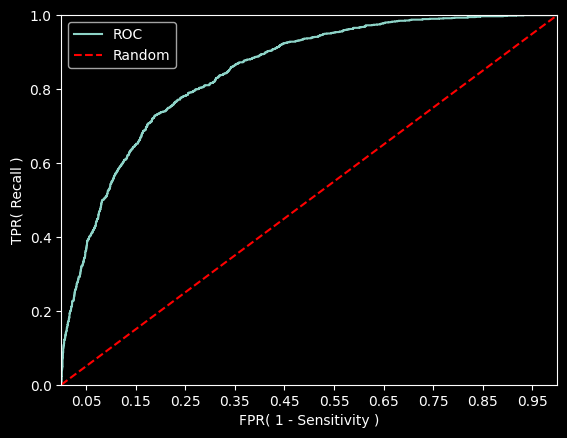

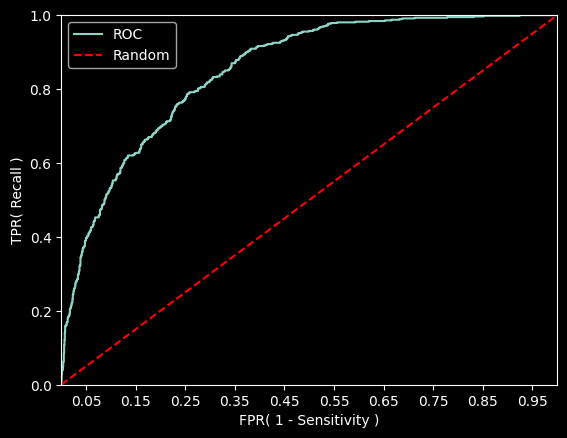

In [ ]:
roc_curve_plot(y_train, y_pred_train_proba)
roc_curve_plot(y_test, y_pred_test_proba)

### · Identify important variables
---
* Finding important variables through feature IMP analysis


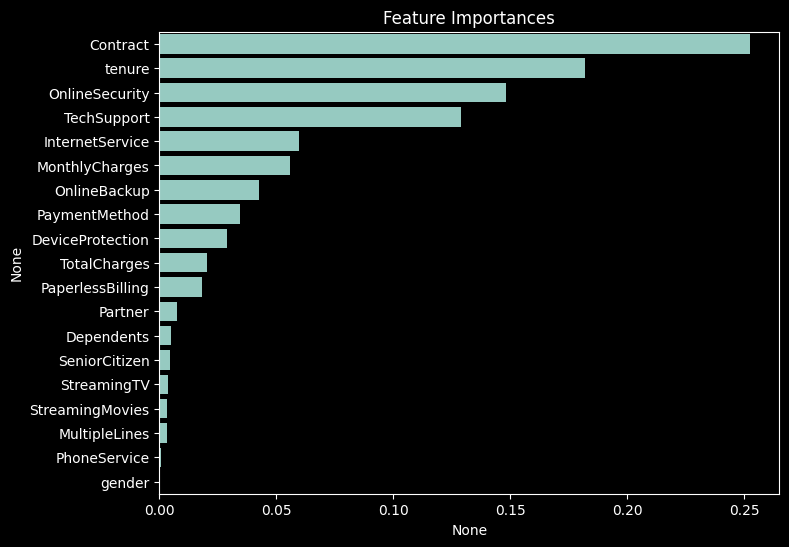

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:31]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
# plt.rc('xtick', labelsize=5)
plt.show()

                count   sum  ratio  lift
Contract                                
Month-to-month   3875  1655   42.7   1.6
One year         1473   166   11.3   0.4
Two year         1695    48    2.8   0.1


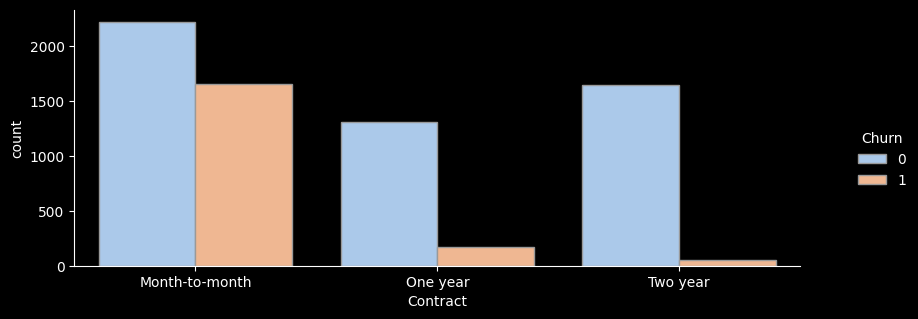

In [ ]:
# ▶ 1st place candidate variable search
val = 'Contract'

sns.catplot(x=val, hue="Churn", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(10, 3)


df_gp = df.groupby(val)['Churn'].agg(['count','sum'])
df_gp['ratio'] = round((df_gp['sum'] / df_gp['count']) * 100, 1)
df_gp['lift'] = round(df_gp['ratio'] / ((df['Churn'].sum() / len(df))*100) ,1)
print(df_gp)


### · Model Save and Read
---
* Save and load the final model


In [ ]:
import pickle
# Model storage
saved_model = pickle.dumps(rfc)

# Model READ
clf_from_pickle = pickle.loads(saved_model)